In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# 1. Definir la ruta de los datos limpios
ruta_datos = '../data/processed/sot_historico_limpio.csv'

# 2. Cargar los datos en un DataFrame
df = pd.read_csv(ruta_datos)

# 3. Mostrar las primeras 5 filas para verificar
df.head()

,ID_SOT,Estado SOT,Fecha Creacion,Fecha Factibilidad,Fecha Atendido Rechazado,ID Rechazo,Departamento,Provincia,Distrito,Region
0,1000001,Pendiente,13/06/2022 18:36,Sin Información,Sin Información,NaN,Ancash,Ocros,Ocros,Centro
1,1000002,Atendido,15/09/2022 14:49,15/09/2022 14:49,21/09/2022 14:49,NaN,Huancavelica,Huancavelica,Acoria,Centro
2,1000003,Atendido,09/02/2022 20:29,12/02/2022 20:29,22/02/2022 20:29,NaN,Huanuco,Yarowilca,Obas,Centro
3,1000004,Pendiente,12/06/2022 08:12,14/06/2022 08:12,Sin Información,NaN,Huanuco,Yarowilca,Chacabamba,Centro
4,1000005,Duplicado/Riesgo/Fraude,17/07/2022 07:32,Sin Información,21/07/2022 07:32,63.0,Loreto,Datem Del Marañon,Cahuapanas,Norte



--- Conteo de SOTs por Región (Texto) ---
Region
Centro    34196
Norte     28863
Sur       27358
Lima       9583
Name: count, dtype: int64

--- Gráfico de SOTs por Región ---


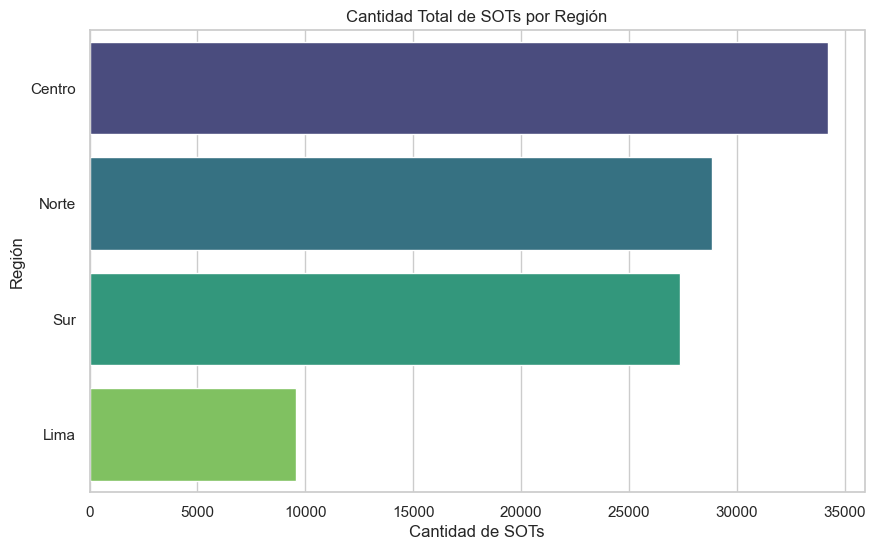

In [5]:
# --- 2. Análisis: Conteo de SOTs por Región ---

if 'df' in locals(): # Solo corre si el df se cargó bien
    
    print("\n--- Conteo de SOTs por Región (Texto) ---")
    # Usamos .value_counts() en la columna 'Region'
    conteo_region = df['Region'].value_counts()
    
    # Imprimimos el resultado en texto
    print(conteo_region)

    
    # --- 3. Visualización: Gráfico de Barras ---
    
    print("\n--- Gráfico de SOTs por Región ---")
    
    # Configuramos el tamaño del gráfico
    plt.figure(figsize=(10, 6))
    
    # Creamos el gráfico de barras
    # Usamos 'y=' para que sea horizontal y se lean bien las regiones
    sns.countplot(data=df, y='Region', order=conteo_region.index, palette='viridis')
    
    # Añadimos títulos
    plt.title('Cantidad Total de SOTs por Región')
    plt.xlabel('Cantidad de SOTs')
    plt.ylabel('Región')
    
    # Mostramos el gráfico
    plt.show()
else:
    print("Error: El DataFrame 'df' no está cargado. Asegúrate de ejecutar la Celda 1 primero.")

Paso 0: Preparando las fechas...
La columna 'Fecha Creacion' ya está en formato datetime.

Paso 1: Filtrando por Región 'Lima'...
Se encontraron 9583 registros para 'Lima'.
Paso 2: Creando la columna 'Mes_YYYYMM'...
Paso 3: Preparando datos para las barras (Total SOTs)...
Paso 4: Preparando datos para las líneas (SOTs por Estado)...
Paso 5: ¡Generando el gráfico!...


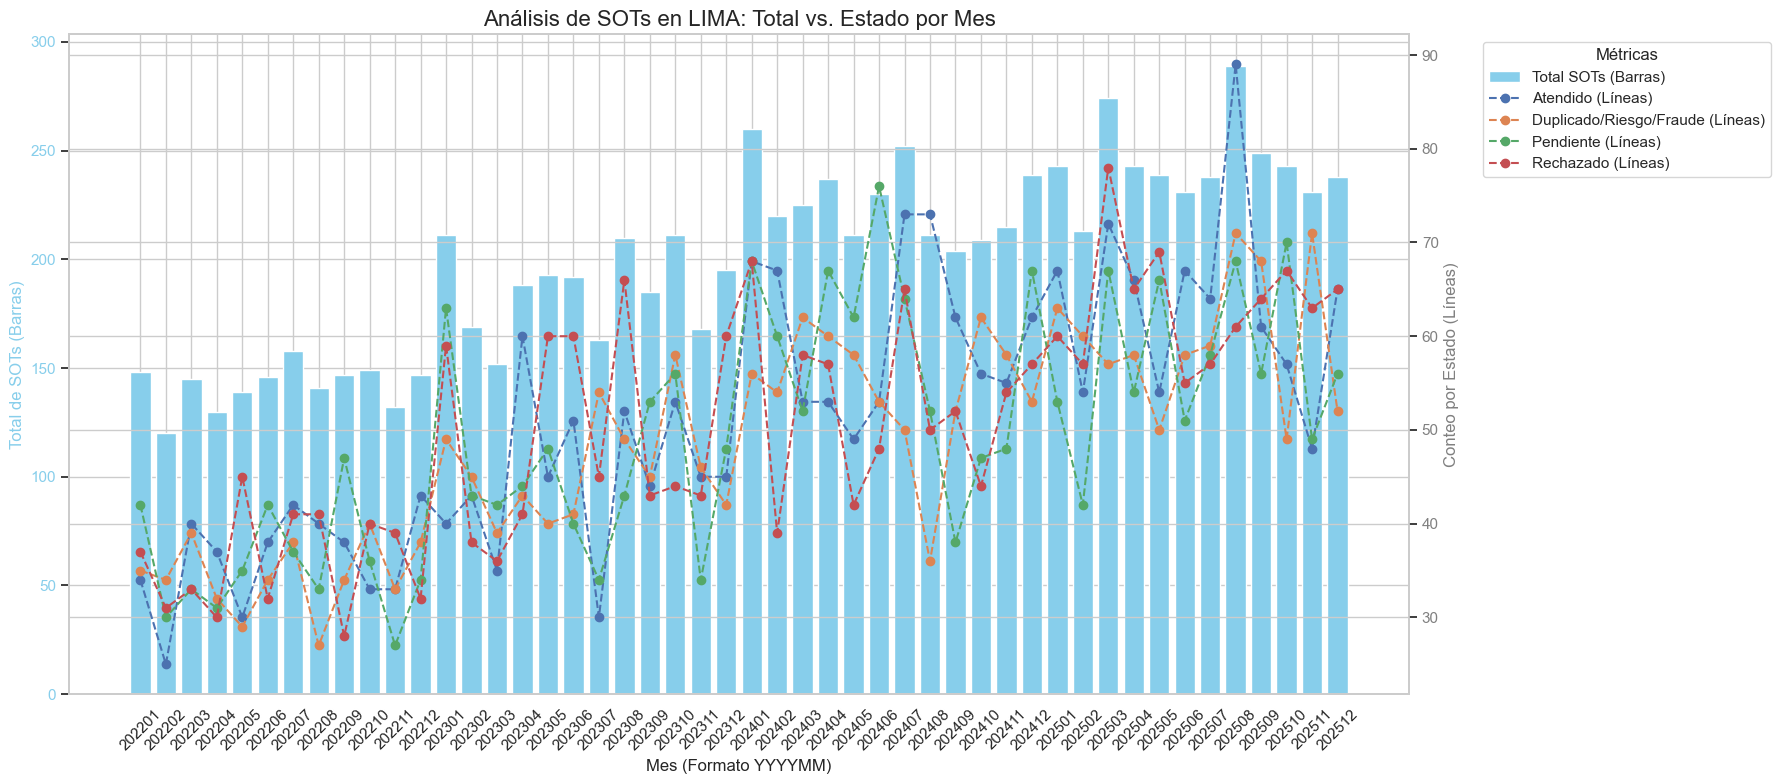

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN: ¡SOLO CAMBIA ESTA LÍNEA! ---
# --------------------------------------------------
REGION_A_ANALIZAR = 'Lima'  # <-- Cambia 'Lima' por 'Norte', 'Centro', etc.
# --------------------------------------------------


# --- 2. Preparación de Fechas (se ejecuta 1 vez) ---
print("Paso 0: Preparando las fechas...")
if 'Fecha Creacion' not in df.columns or df['Fecha Creacion'].dtype == 'object':
    print("Convirtiendo 'Fecha Creacion' a formato datetime...")
    df['Fecha Creacion'] = pd.to_datetime(df['Fecha Creacion'], dayfirst=True, errors='coerce')
    df = df.dropna(subset=['Fecha Creacion'])
else:
    print("La columna 'Fecha Creacion' ya está en formato datetime.")


# --- 3. Filtrar por la Región seleccionada ---
print(f"\nPaso 1: Filtrando por Región '{REGION_A_ANALIZAR}'...")
df_filtrado = df[df['Region'] == REGION_A_ANALIZAR].copy()

# --- 4. Ejecutar Análisis (Solo si se encontraron datos) ---
if df_filtrado.empty:
    print(f"ERROR: No se encontraron datos para la región '{REGION_A_ANALIZAR}'.")
else:
    print(f"Se encontraron {len(df_filtrado)} registros para '{REGION_A_ANALIZAR}'.")

    # --- 4a. Crear Columna de Mes (Formato YYYYMM) ---
    print("Paso 2: Creando la columna 'Mes_YYYYMM'...")
    df_filtrado['Mes_YYYYMM'] = df_filtrado['Fecha Creacion'].dt.strftime('%Y%m')

    # --- 4b. Preparar Datos para las Barras (Total SOTs) ---
    print("Paso 3: Preparando datos para las barras (Total SOTs)...")
    df_bars = df_filtrado.groupby('Mes_YYYYMM').size().reset_index(name='Total SOTs')
    df_bars = df_bars.sort_values('Mes_YYYYMM')

    # --- 4c. Preparar Datos para las Líneas (Conteo por Estado) ---
    print("Paso 4: Preparando datos para las líneas (SOTs por Estado)...")
    df_lines_prep = df_filtrado.groupby(['Mes_YYYYMM', 'Estado SOT']).size().reset_index(name='Cuenta')
    df_lines = df_lines_prep.pivot(index='Mes_YYYYMM', columns='Estado SOT', values='Cuenta').fillna(0)

    # --- 5. Crear el Gráfico Combinado ---
    print("Paso 5: ¡Generando el gráfico!...")
    
    sns.set_theme(style="whitegrid")
    fig, ax1 = plt.subplots(figsize=(18, 8))

    # --- 5a. Plotear las Barras (Eje Y Izquierdo) ---
    color_bar = 'skyblue'
    ax1.set_xlabel('Mes (Formato YYYYMM)', fontsize=12)
    ax1.set_ylabel('Total de SOTs (Barras)', color=color_bar, fontsize=12)
    ax1.bar(df_bars['Mes_YYYYMM'], df_bars['Total SOTs'], color=color_bar, label='Total SOTs (Barras)')
    ax1.tick_params(axis='y', labelcolor=color_bar)
    ax1.tick_params(axis='x', rotation=45)

    # --- 5b. Crear Eje Y Secundario (Derecho) ---
    ax2 = ax1.twinx()
    color_line = 'gray'
    ax2.set_ylabel('Conteo por Estado (Líneas)', color=color_line, fontsize=12)
    ax2.tick_params(axis='y', labelcolor=color_line)

    # --- 5c. Plotear las Líneas (Eje Y Derecho) ---
    for estado in df_lines.columns:
        ax2.plot(df_lines.index, df_lines[estado], 
                 marker='o', linestyle='--', label=f'{estado} (Líneas)')

    # --- 5d. Título y Leyendas (Dinámicos) ---
    # El título se actualiza solo con la región que elegiste
    plt.title(f'Análisis de SOTs en {REGION_A_ANALIZAR.upper()}: Total vs. Estado por Mes', fontsize=16)
    
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    
    plt.legend(handles1 + handles2, labels1 + labels2, 
               title="Métricas", 
               bbox_to_anchor=(1.05, 1), 
               loc='upper left')

    # --- 5e. Ajuste final ---
    fig.tight_layout()
    plt.show()

--- Iniciando análisis por: Region ---
Paso 1: Calculando Total SOTs Creadas por Region...
Paso 2: Calculando Total SOTs Atendidas por Region...
Paso 3: Combinando datos y calculando porcentaje de eficiencia...
Datos agregados listos:


,Region,Total Creadas,Total Atendidas,% Atendidas
1,Lima,9583,2464,25.712199
2,Norte,28863,7318,25.354260
0,Centro,34196,8536,24.961984
3,Sur,27358,6768,24.738650


Paso 4: Generando gráfico de dispersión (Eficiencia vs. Volumen)...
Paso 5: Añadiendo etiquetas al gráfico...


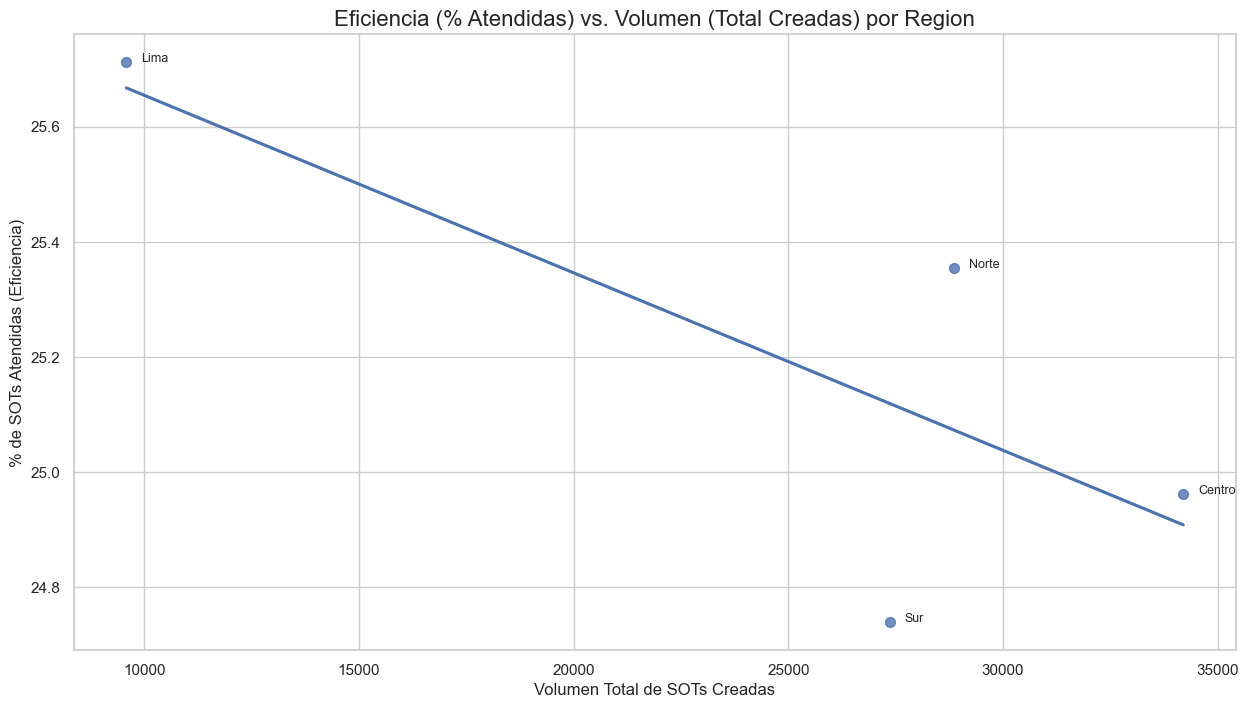

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN: ¡SOLO CAMBIA ESTA LÍNEA! ---
# -------------------------------------------------------------
DIMENSION_DE_ANALISIS = 'Region'  # <-- Cambia esto por 'Departamento' para el otro análisis
# -------------------------------------------------------------


# --- 2. Verificar que 'df' existe ---
if 'df' not in locals():
    print("ERROR: El DataFrame 'df' no está cargado. Asegúrate de ejecutar la Celda 1 primero.")
else:
    print(f"--- Iniciando análisis por: {DIMENSION_DE_ANALISIS} ---")

    # --- 3. Calcular Total SOTs Creadas (Volumen) ---
    print(f"Paso 1: Calculando Total SOTs Creadas por {DIMENSION_DE_ANALISIS}...")
    total_sots = df.groupby(DIMENSION_DE_ANALISIS).size().reset_index(name='Total Creadas')

    # --- 4. Calcular Total SOTs Atendidas ---
    print(f"Paso 2: Calculando Total SOTs Atendidas por {DIMENSION_DE_ANALISIS}...")
    # Filtramos primero, luego agrupamos
    atendidas_sots = df[df['Estado SOT'] == 'Atendido'].groupby(DIMENSION_DE_ANALISIS).size().reset_index(name='Total Atendidas')

    # --- 5. Combinar datos y Calcular el % de Eficiencia ---
    print("Paso 3: Combinando datos y calculando porcentaje de eficiencia...")
    # Unimos los dos conteos. Usamos 'how=left' por si una región no tiene NINGUNA atendida
    df_agg = pd.merge(total_sots, atendidas_sots, on=DIMENSION_DE_ANALISIS, how='left')
    
    # Si una región tuvo 0 atendidas, el merge crea un 'NaN' (Nulo). Lo reemplazamos con 0.
    df_agg['Total Atendidas'] = df_agg['Total Atendidas'].fillna(0)
    
    # Calculamos el porcentaje
    df_agg['% Atendidas'] = (df_agg['Total Atendidas'] / df_agg['Total Creadas']) * 100
    
    print("Datos agregados listos:")
    display(df_agg.sort_values(by='% Atendidas', ascending=False).head())


    # --- 6. Graficar (Scatter Plot) ---
    print("Paso 4: Generando gráfico de dispersión (Eficiencia vs. Volumen)...")
    plt.figure(figsize=(15, 8))
    
    # Usamos sns.regplot para un gráfico de dispersión que incluye una línea de tendencia
    # Esto te mostrará si hay una correlación (ej: "a más SOTs, ¿baja la eficiencia?")
    sns.regplot(data=df_agg,
                x='Total Creadas',
                y='% Atendidas',
                ci=None, # Desactiva el intervalo de confianza (es más limpio)
                scatter_kws={'s': 50}) # 's' es el tamaño de los puntos

    # --- 7. Añadir Etiquetas a los Puntos ---
    # Esto es clave para que sepas qué punto es cada región/departamento
    print("Paso 5: Añadiendo etiquetas al gráfico...")
    for i, row in df_agg.iterrows():
        # Coloca el texto (el nombre de la Región/Dpto) al lado de cada punto
        plt.text(row['Total Creadas'] + (df_agg['Total Creadas'].max() * 0.01), # Pequeño offset en X
                 row['% Atendidas'], # Y
                 row[DIMENSION_DE_ANALISIS], # El texto a mostrar
                 fontsize=9)
    
    # --- 8. Títulos y Finalización ---
    plt.title(f'Eficiencia (% Atendidas) vs. Volumen (Total Creadas) por {DIMENSION_DE_ANALISIS}', fontsize=16)
    plt.xlabel('Volumen Total de SOTs Creadas', fontsize=12)
    plt.ylabel('% de SOTs Atendidas (Eficiencia)', fontsize=12)
    plt.grid(True)
    plt.show()

--- Iniciando análisis para Región: Norte ---
Paso 1: Preparando columnas de fecha y mes (YYYYMM)...
Paso 2: Filtrando datos para la Región 'Norte'...
Paso 3: Filtrando también para el Mes '202501'...
Paso 4: Calculando Total SOTs Creadas por Departamento...
Paso 5: Calculando Total SOTs Atendidas por Departamento...
Paso 6: Combinando datos y calculando porcentaje de eficiencia...
Datos agregados listos:


,Departamento,Total Creadas,Total Atendidas,% Atendidas
4,Loreto,75,22,29.333333
1,Cajamarca,182,53,29.120879
6,San Martin,107,29,27.102804
0,Amazonas,108,28,25.925926
5,Piura,89,19,21.348315


Paso 7: Generando gráfico de dispersión...
Paso 8: Añadiendo etiquetas de Departamento al gráfico...


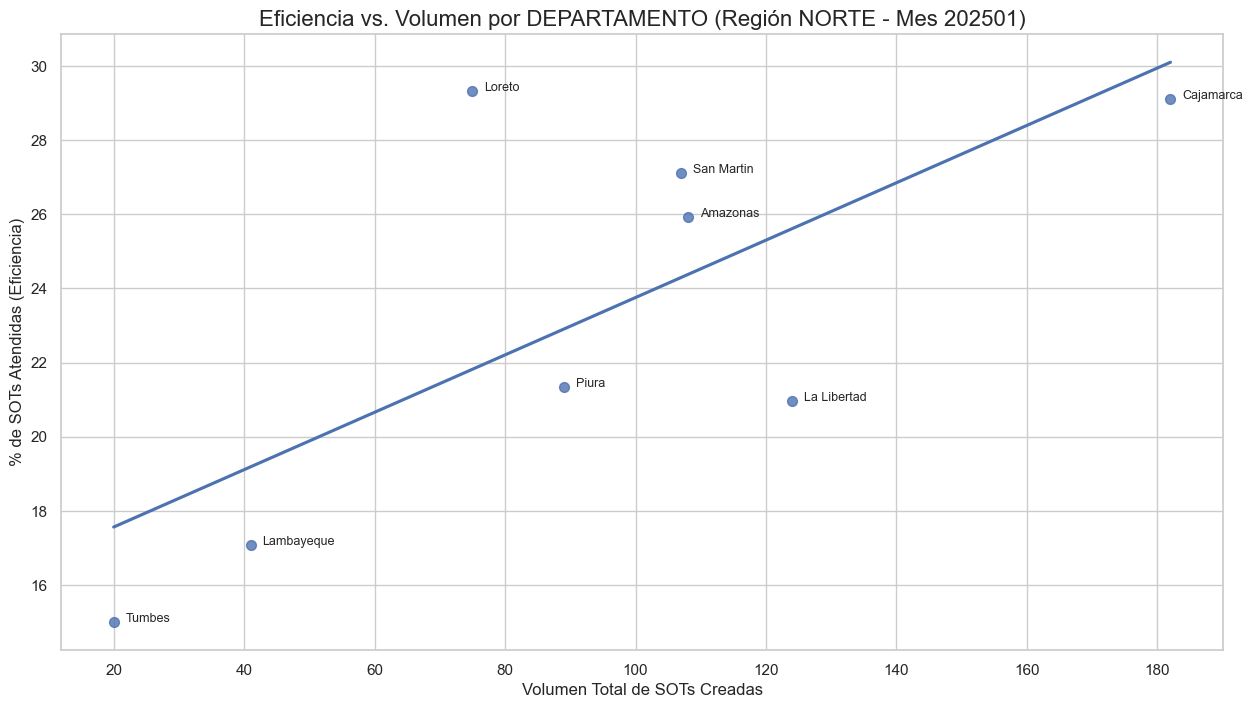

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. CONFIGURACIÓN: ¡SOLO CAMBIA ESTAS LÍNEAS! ---
# -----------------------------------------------------------------
REGION_A_ANALIZAR = 'Norte'     # Elige la Región que quieres analizar
MES_A_ANALIZAR = '202501'   # Elige el mes (ej: '202206') o pon 'None' para ver todos
# -----------------------------------------------------------------


# --- 2. Verificar que 'df' existe ---
if 'df' not in locals():
    print("ERROR: El DataFrame 'df' no está cargado. Asegúrate de ejecutar la Celda 1 primero.")
else:
    print(f"--- Iniciando análisis para Región: {REGION_A_ANALIZAR} ---")

    # --- 3. Preparación de Fechas y Mes (¡Importante!) ---
    # Esto debe hacerse ANTES de filtrar por mes
    print("Paso 1: Preparando columnas de fecha y mes (YYYYMM)...")
    if 'Fecha Creacion' not in df.columns or df['Fecha Creacion'].dtype == 'object':
        df['Fecha Creacion'] = pd.to_datetime(df['Fecha Creacion'], dayfirst=True, errors='coerce')
        df = df.dropna(subset=['Fecha Creacion'])
    
    # Creamos la columna YYYYMM en el DF principal
    df['Mes_YYYYMM'] = df['Fecha Creacion'].dt.strftime('%Y%m')

    # --- 4. Filtrar por Región y Mes (Dinámico) ---
    print(f"Paso 2: Filtrando datos para la Región '{REGION_A_ANALIZAR}'...")
    df_filtrado = df[df['Region'] == REGION_A_ANALIZAR].copy()
    
    # Título para el gráfico (se irá completando)
    titulo_grafico = f'Eficiencia vs. Volumen por DEPARTAMENTO (Región {REGION_A_ANALIZAR.upper()}'

    # Aplicamos el filtro de MES si existe
    if MES_A_ANALIZAR:
        print(f"Paso 3: Filtrando también para el Mes '{MES_A_ANALIZAR}'...")
        df_filtrado = df_filtrado[df_filtrado['Mes_YYYYMM'] == MES_A_ANALIZAR].copy()
        titulo_grafico += f" - Mes {MES_A_ANALIZAR})" # Completamos el título
    else:
        print("Paso 3: Analizando TODOS los meses para esta región.")
        titulo_grafico += " - Todos los Meses)" # Completamos el título

    # --- 5. Ejecutar Análisis (si hay datos) ---
    if df_filtrado.empty:
        print(f"ERROR: No se encontraron datos para la Región '{REGION_A_ANALIZAR}'" + (f" en el mes '{MES_A_ANALIZAR}'" if MES_A_ANALIZAR else "."))
    else:
        # --- 5a. Calcular Total SOTs Creadas (Volumen) por DEPARTAMENTO ---
        print(f"Paso 4: Calculando Total SOTs Creadas por Departamento...")
        total_sots = df_filtrado.groupby('Departamento').size().reset_index(name='Total Creadas')

        # --- 5b. Calcular Total SOTs Atendidas por DEPARTAMENTO ---
        print(f"Paso 5: Calculando Total SOTs Atendidas por Departamento...")
        atendidas_sots = df_filtrado[df_filtrado['Estado SOT'] == 'Atendido'].groupby('Departamento').size().reset_index(name='Total Atendidas')

        # --- 5c. Combinar datos y Calcular el % de Eficiencia ---
        print("Paso 6: Combinando datos y calculando porcentaje de eficiencia...")
        df_agg = pd.merge(total_sots, atendidas_sots, on='Departamento', how='left')
        df_agg['Total Atendidas'] = df_agg['Total Atendidas'].fillna(0)
        
        df_agg['% Atendidas'] = 0.0
        df_agg.loc[df_agg['Total Creadas'] > 0, '% Atendidas'] = (df_agg['Total Atendidas'] / df_agg['Total Creadas']) * 100
        
        print("Datos agregados listos:")
        display(df_agg.sort_values(by='% Atendidas', ascending=False).head())

        # --- 6. Graficar (Scatter Plot) ---
        print("Paso 7: Generando gráfico de dispersión...")
        plt.figure(figsize=(15, 8))
        
        sns.regplot(data=df_agg, x='Total Creadas', y='% Atendidas', ci=None, scatter_kws={'s': 50})

        # --- 7. Añadir Etiquetas de DEPARTAMENTO a los Puntos ---
        print("Paso 8: Añadiendo etiquetas de Departamento al gráfico...")
        for i, row in df_agg.iterrows():
            plt.text(row['Total Creadas'] + (df_agg['Total Creadas'].max() * 0.01), 
                     row['% Atendidas'], 
                     row['Departamento'], 
                     fontsize=9)
        
        # --- 8. Títulos y Finalización ---
        plt.title(titulo_grafico, fontsize=16) # Usamos el título dinámico
        plt.xlabel('Volumen Total de SOTs Creadas', fontsize=12)
        plt.ylabel('% de SOTs Atendidas (Eficiencia)', fontsize=12)
        plt.grid(True)
        plt.show()